In [80]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi 
from MCForecastTools import MCSimulation
%matplotlib inline

In [81]:
load_dotenv()

True

In [82]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [83]:
# part 1 - Personal Finance Planner
#avg income = $12,000
#BTC = 1.2, ETH = 5.3, SPY = 50, AGG = 200

In [84]:
my_btc = 1.2
my_eth = 5.3

In [85]:
# fetch current BTC Price
btc_price = requests.get(btc_url)
my_btc_value = btc_price.json()['data']['1']['quotes']['CAD']['price']*my_btc


#fetch current ETH Price
eth_price = requests.get(eth_url)
my_eth_value = eth_price.json()['data']['1027']['quotes']['CAD']['price']*my_eth




print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $17931.94
The current value of your 5.3 ETH is $2561.18


In [86]:
my_agg = 200
my_spy = 50

In [87]:
# set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [88]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [89]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [90]:
# Format current date as ISO format

today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

tickers = ["SPY","AGG"]
timeframe="1D"

In [91]:
# Get current closing prices 

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [92]:
# print AGG and SPY close price
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [93]:
# compute value of the current amount of shares
my_agg_value = agg_price*my_agg
my_spy_value = spy_price*my_spy
print(f"The current value of your {my_agg} AGG is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY is ${my_spy_value:0.2f}")

The current value of your 200 AGG is $23576.00
The current value of your 50 SPY is $17362.50


## Savings Health Analysis

In [94]:
#declared crypto and shares total value and declared monthly income

monthly_income = 12000
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

In [104]:
# create dict and dataframe
savings = {"Amount": [crypto_value, shares_value]}
df_savings = pd.DataFrame(savings, index =["Crypto","Shares"])
df_savings

,Amount
Crypto,20493.119659
Shares,40938.500000


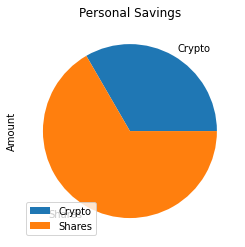

In [96]:
#plot a pie chart to show personal savings
df_savings.plot.pie(y="Amount", title="Personal Savings")


In [139]:
# Emergency Fund
emergency_fund = monthly_income*3
total_savings = crypto_value + shares_value

In [141]:
print(emergency_fund)
print(total_savings)

36000
61431.619659


In [149]:
# validate savings

if total_savings > emergency_fund:
    print("Congrats, you have more than enough saved for emergencies!")
elif total_savings == emergency_fund:
    print("Good job! You've reached your emergency fund goal!")
elif total_savings < emergency_fund:
    print(f"You are working hard. You are ${emergency_fund - total_savings} away from your savings goals.")
else:
    print("Didn't enter a savings.")


Congrats, you have more than enough saved for emergencies!
